# Create heuristic model (avg pixel movement)

In [1]:
import pandas as pd
import numpy as np

In [2]:
VIDEO_LABELS_FILE_NAME = '../v2 (increase fps)/data/VID_20180325_143338.mp4.csv'

In [3]:
X = np.load('../v2 (increase fps)/data/gray_compressed_data_VID_20180325_143338.mp4.npy')
X = X.reshape([*X.shape,1])
y = pd.read_csv(VIDEO_LABELS_FILE_NAME, sep=',').values[:,1]

X.shape, y.shape

((1335, 96, 144, 1), (1335,))

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

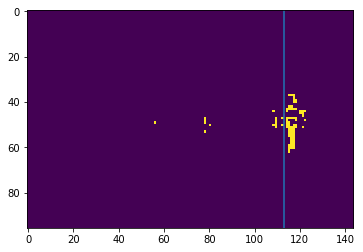

In [28]:
delta = (X[0,:,:,0] - X[10,:,:,0])>0.1
plt.imshow(delta)
avg = (delta.sum(axis=0) * np.arange(144)).sum()/delta.sum()
plt.axvline(avg)

In [29]:
points = []
for i in range(int(1335/10)):
    start = i*10
    delta = (X[start,:,:,0] - X[start+10,:,:,0])>0.1
    avg = (delta.sum(axis=0) * np.arange(144)).sum()/delta.sum()
    points.append(avg)

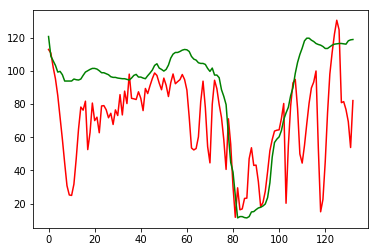

In [40]:
plt.plot(points, c='r')
plt.plot(y[:-10:10]*144, c='g')

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
mean_absolute_error(y[:-10:10]*144, points)

24.891109030158347

## Experiment with vertically weighted pixel avg